Импорт библиотек для 5 практики


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, 
    recall_score, f1_score, confusion_matrix, 
    roc_curve, precision_recall_curve, average_precision_score, brier_score_loss
)

In [3]:
os.makedirs("figures", exist_ok=True) #создание папки, если ее нет

Загрузить датасет S05-hw-dataset.csv в pandas.DataFrame с помощью pd.read_csv

In [4]:
df = pd.read_csv("S05-hw-dataset.csv")

первые строки датасета (head()),

In [5]:
print("Первые 5 строк:")
display(df.head())

Первые 5 строк:


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


информацию о столбцах и типах (info()),

In [6]:
print("\nИнформация о датасете:")
df.info()


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_ris

базовые описательные статистики для числовых признаков (describe() или аналог),

In [7]:
print("\nОписательная статистика:")
display(df.describe())


Описательная статистика:


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


распределение целевого признака default (например, через value_counts(normalize=True)).

In [9]:
print("\nРаспределение целевого признака (default):")
print(df['default'].value_counts(normalize=True))


Распределение целевого признака (default):
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


ИТОГО: всего в датасете 3000 объектов и 17 признаков (features). Пропусков не обнаружено, что хорошо. Ну и таргет default распределен достаточно равномерно (59/41). Работаем

Подготовка признаков и таргета

In [ ]:
# Удаление ID и выделение таргета
X = df.drop(columns=['client_id', 'default'])
y = df['default']

In [ ]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (2400, 15)
Размер тестовой выборки: (600, 15)


DummyClassifier задает нижнюю планку качества. Если сложная модель работает не лучше DummyClassifier, значит, она не выучила полезных закономерностей.

In [12]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

dummy_acc = accuracy_score(y_test, dummy.predict(X_test))
dummy_roc = roc_auc_score(y_test, dummy.predict_proba(X_test)[:, 1])

print(f"Baseline Accuracy: {dummy_acc:.4f}")
print(f"Baseline ROC-AUC: {dummy_roc:.4f}")

Baseline Accuracy: 0.5900
Baseline ROC-AUC: 0.5000


Логистическая регрессия

In [13]:
#Pipeline: масштабирование + модель
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

# Подбор гиперпараметра C
param_grid = {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f"Лучшее значение C: {grid.best_params_['logreg__C']}")

# Предсказания
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Метрики
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_proba),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1": f1_score(y_test, y_pred)
}

for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

Лучшее значение C: 100
Accuracy: 0.8017
ROC-AUC: 0.8756
Precision: 0.7953
Recall: 0.6951
F1: 0.7419


Визуализация (ROC-кривая)

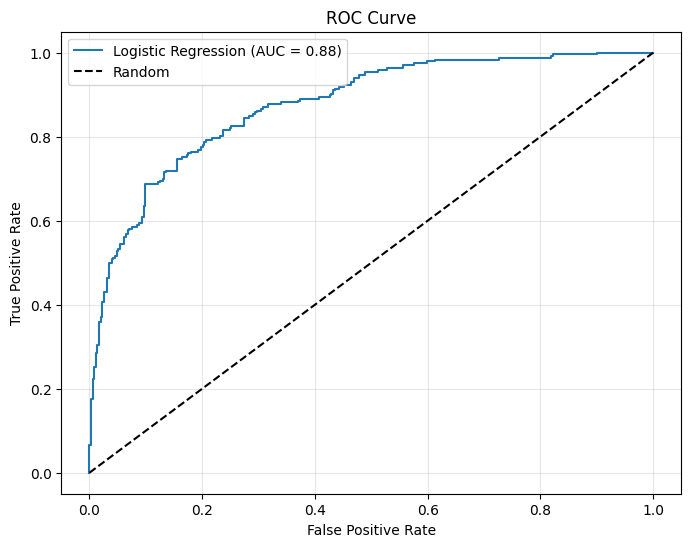

In [14]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {metrics["ROC-AUC"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("figures/roc_curve.png")
plt.show()

PR-кривая и Калибровка

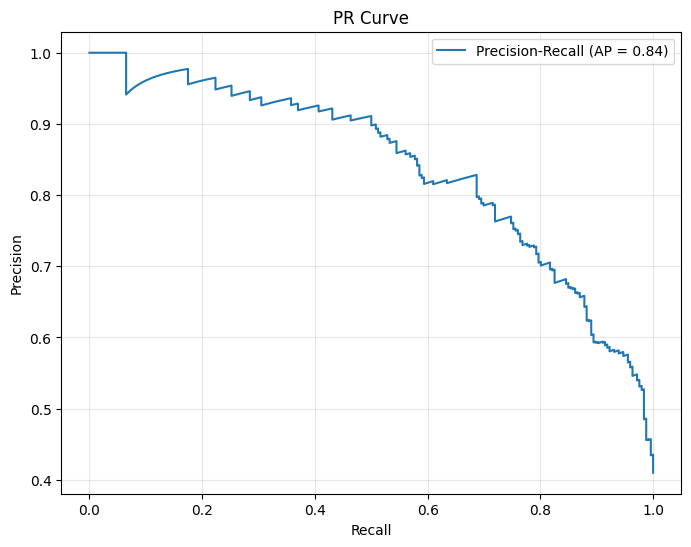

In [15]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_p = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall (AP = {avg_p:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("figures/pr_curve.png")
plt.show()

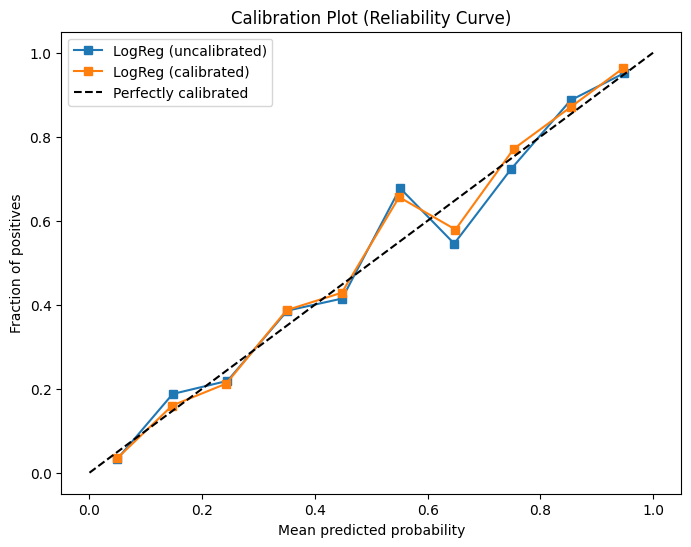

In [16]:
# Калибровка модели
calibrated = CalibratedClassifierCV(best_model, method='sigmoid', cv=5)
calibrated.fit(X_train, y_train)
y_proba_calib = calibrated.predict_proba(X_test)[:, 1]

# Визуализация калибровочной кривой
plt.figure(figsize=(8, 6))
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_proba_calib, n_bins=10)

plt.plot(prob_pred, prob_true, "s-", label="LogReg (uncalibrated)")
plt.plot(prob_pred_cal, prob_true_cal, "s-", label="LogReg (calibrated)")
plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")
plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted probability")
plt.title("Calibration Plot (Reliability Curve)")
plt.legend()
plt.savefig("figures/calibration_plot.png")
plt.show()

Итог

In [17]:
results = pd.DataFrame({
    "Metric": ["Accuracy", "ROC-AUC"],
    "Baseline (Dummy)": [dummy_acc, dummy_roc],
    "Logistic Regression": [metrics["Accuracy"], metrics["ROC-AUC"]]
})
display(results)

,Metric,Baseline (Dummy),Logistic Regression
0,Accuracy,0.59,0.801667
1,ROC-AUC,0.50,0.875649


По итогу
1) бейзлайн значительно уступает логистической регрессии по метрикам. 0.5 и 0.59 против 0.875 и 0.8
2) accuracy и roc-auc выросли на 20-30%
3) C=100. Для данного датасета лучше всего подходит слабая регуляризация, позволяющая модели максимально использовать свойства признаков без риска немедленного переобучения. Значения Precision (0.79) и Recall (0.69) указывают на то, что модель достаточно сбалансирована, хотя и склонна чуть более точно предсказывать отсутствие дефолта, чем его наличие
4) Логистическая регрессия является хорошей моделью для данного датасета. Она показала хороший прирост качества по сравнению с бейзлайном